# Trains in India Analysis
#By- Aarush Kumar
#Dated: July 22,2021

In [1]:
from IPython.display import Image
Image(url='https://akm-img-a-in.tosshub.com/businesstoday/images/story/201903/vande-bharat-660_030719125448.jpg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.map import Icon

In [3]:
df_trains = pd.read_csv('/home/aarush100616/Downloads/Projects/Trains in India EDA/All_Indian_Trains.csv')
df_cities = pd.read_csv("/home/aarush100616/Downloads/Projects/Trains in India EDA/cities_r2.csv")
df_wcities = pd.read_csv("/home/aarush100616/Downloads/Projects/Trains in India EDA/worldcitiespop.csv")

/home/aarush100616/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_trains

Unnamed: 0  Train no.                     Train name  \
0              0      12723         Andhra Pradesh Express   
1              1      22416         Andhra Pradesh Express   
2              2      12724         Andhra Pradesh Express   
3              3      12707  Andhra Pradesh Sampark Kranti   
4              4      15909            Abadh Assam Express   
...          ...        ...                            ...   
4019         218      12551              Yprkyq Ac Express   
4020         219       2651                 Yprkyq Express   
4021         220       2551                 Yprkyq Express   
4022         221      12395                Ziyarat Express   
4023         222      12396                Ziyarat Express   

                     Starts                Ends  
0           Hyderabad Decan           New Delhi  
1                 New Delhi       Vishakapatnam  
2                 New Delhi     Hyderabad Decan  
3                  Tirupati        H Nizamuddin  
4     New Tinsukia Junction  Darbhanga Junction  
...                     ...                 ...  
4019    Yesvantpur Junction            Kamakhya  
4020    Yesvantpur Junction            Kamakhya  
4021    Yesvantpur Junction            Kamakhya  
4022        Rjndr Ngr Bihar      Ajmer Junction  
4023         Ajmer Junction     Rjndr Ngr Bihar  

[4024 rows x 5 columns]

In [6]:
df_cities

name_of_city  state_code      state_name  dist_code  population_total  \
0          Abohar            3          PUNJAB          9            145238   
1        Achalpur           27     MAHARASHTRA          7            112293   
2        Adilabad           28  ANDHRA PRADESH          1            117388   
3       Adityapur           20       JHARKHAND         24            173988   
4           Adoni           28  ANDHRA PRADESH         21            166537   
..             ...         ...             ...        ...               ...   
488  Vizianagaram           28  ANDHRA PRADESH         12            227533   
489      Warangal           28  ANDHRA PRADESH          9            620116   
490        Wardha           27     MAHARASHTRA          8            105543   
491   Yamunanagar            6         HARYANA          3            216628   
492      Yavatmal           27     MAHARASHTRA         14            116714   

     population_male  population_female  0-6_population_total  \
0              76840              68398                 15870   
1              58256              54037                 11810   
2              59232              58156                 13103   
3              91495              82493                 23042   
4              82743              83794                 18406   
..               ...                ...                   ...   
488           111596             115937                 20487   
489           310400             309716                 55392   
490            53241              52302                  9754   
491           115404             101224                 22905   
492            58717              57997                 11081   

     0-6_population_male  0-6_population_female  ...  literates_female  \
0                   8587                   7283  ...             44972   
1                   6186                   5624  ...             43086   
2                   6731                   6372  ...             37660   
3                  12063                  10979  ...             54515   
4                   9355                   9051  ...             45089   
..                   ...                    ...  ...               ...   
488                10495                   9992  ...             80306   
489                28434                  26958  ...            217136   
490                 5139                   4615  ...             43339   
491                12556                  10349  ...             74255   
492                 5894                   5187  ...             46561   

     sex_ratio  child_sex_ratio  effective_literacy_rate_total  \
0          890              848                          79.86   
1          928              909                          91.99   
2          982              947                          80.51   
3          902              910                          83.46   
4         1013              968                          68.38   
..         ...              ...                            ...   
488       1039              952                          81.85   
489        998              948                          84.16   
490        982              898                          94.05   
491        877              824                          85.91   
492        988              880                          91.81   

     effective_literacy_rate_male  effective_literacy_rate_female  \
0                           85.49                           73.59   
1                           94.77                           89.00   
2                           88.18                           72.73   
3                           89.98                           76.23   
4                           76.58                           60.33   
..                            ...                             ...   
488                         88.18                           75.80   
489                         91.54         

In [7]:
df_wcities

Country         City   AccentCity Region  Population   Latitude  \
0            ad        aixas        Aixàs      6         NaN  42.483333   
1            ad   aixirivali   Aixirivali      6         NaN  42.466667   
2            ad   aixirivall   Aixirivall      6         NaN  42.466667   
3            ad    aixirvall    Aixirvall      6         NaN  42.466667   
4            ad     aixovall     Aixovall      6         NaN  42.466667   
...         ...          ...          ...    ...         ...        ...   
3173953      zw   zimre park   Zimre Park      4         NaN -17.866111   
3173954      zw  ziyakamanas  Ziyakamanas      0         NaN -18.216667   
3173955      zw   zizalisari   Zizalisari      4         NaN -17.758889   
3173956      zw      zuzumba      Zuzumba      6         NaN -20.033333   
3173957      zw   zvishavane   Zvishavane      7     79876.0 -20.333333   

         Longitude  
0         1.466667  
1         1.500000  
2         1.500000  
3         1.500000  
4         1.483333  
...            ...  
3173953  31.213611  
3173954  27.950000  
3173955  31.010556  
3173956  27.933333  
3173957  30.033333  

[3173958 rows x 7 columns]

In [8]:
sub_wcities = pd.concat([df_wcities[df_wcities['Country'] == 'in'], df_wcities[df_wcities['Country'] == 'bd'] ,df_wcities[df_wcities['Country'] == 'bt'],df_wcities[df_wcities['Country'] == 'np'],df_wcities[df_wcities['Country'] == 'pk']])

In [9]:
df_trains.head(10)

Unnamed: 0  Train no.                     Train name  \
0           0      12723         Andhra Pradesh Express   
1           1      22416         Andhra Pradesh Express   
2           2      12724         Andhra Pradesh Express   
3           3      12707  Andhra Pradesh Sampark Kranti   
4           4      15909            Abadh Assam Express   
5           5      18242          Abkp Durg Passenger E   
6           6      11266               Abkp Jbp Express   
7           7      58702             Abkp Sdl Passenger   
8           8      54703                Abs Ju Passengr   
9           9       7509                Adb Qln Special   

                  Starts                Ends  
0        Hyderabad Decan           New Delhi  
1              New Delhi       Vishakapatnam  
2              New Delhi     Hyderabad Decan  
3               Tirupati        H Nizamuddin  
4  New Tinsukia Junction  Darbhanga Junction  
5              Ambikapur                Durg  
6              Ambikapur            Jabalpur  
7              Ambikapur             Shahdol  
8                 Abohar    Jodhpur Junction  
9               Adilabad     Kollam Junction

In [10]:
len(df_trains)

4024

In [11]:
sub_wcities.head(10)

Country          City    AccentCity Region  Population   Latitude  \
1321831      in        aajpur        Aajpur     12         NaN  32.491207   
1321832      in          abad          Abad     28         NaN  22.432778   
1321833      in      abadgarh      Abadgarh     36         NaN  29.581389   
1321834      in  abadi rajgir  Abadi Rajgir     36         NaN  27.028800   
1321835      in      abadpura      Abadpura     23         NaN  31.316667   
1321836      in      abaibani      Abaibani     28         NaN  22.300000   
1321837      in         abara         Abara     35         NaN  21.733333   
1321838      in      abbigeri      Abbigeri     19         NaN  15.583333   
1321839      in      abdalpur      Abdalpur     23         NaN  30.246200   
1321840      in      abdalpur      Abdalpur     36         NaN  29.723889   

         Longitude  
1321831  74.755827  
1321832  88.777778  
1321833  77.390000  
1321834  79.961700  
1321835  75.566667  
1321836  86.933333  
1321837  78.566667  
1321838  75.766667  
1321839  76.596900  
1321840  77.495556

In [12]:
len(sub_wcities[sub_wcities['Country'] == 'in'])

39813

In [13]:
df_cities.head(10)

name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   
5    Agartala           16         TRIPURA          1            399688   
6        Agra            9   UTTAR PRADESH         15           1574542   
7   Ahmadabad           24         GUJARAT          7           5570585   
8  Ahmadnagar           27     MAHARASHTRA         26            350905   
9      Aizawl           15         MIZORAM          3            291822   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   
5           199616             200072                 33635   
6           849771             724771                186516   
7          2935869            2634716                589076   
8           179755             171150                 36712   
9           143803             148019                 35147   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1                 6186                   5624  ...             43086   
2                 6731                   6372  ...             37660   
3                12063                  10979  ...             54515   
4                 9355                   9051  ...             45089   
5                17341                  16294  ...            169109   
6               105279                  81237  ...            376725   
7               317917                 271159  ...           2004480   
8                19748                  16964  ...            134649   
9                17667                  17480  ...            128332   

   sex_ratio  child_sex_ratio  effective_literacy_rate_total  \
0        890              848                          79.86   
1        928              909                          91.99   
2        982              947                          80.51   
3        902              910                          83.46   
4       1013              968                          68.38   
5       1002              940                          93.88   
6        853              772                          63.44   
7        897              853                          89.62   
8        952              859                          91.49   
9       1029              989                          98.80   

   effective_literacy_rate_male  effective_literacy_rate_female  \
0                         85.49                           73.59   
1                         94.77                           89.00   
2                         88.18                           72.73   
3                         89.98                           76.23   
4                         76.58                           60.33   
5                         95.75                           92.02   
6                         67.67                           58.54   
7                         93.96                           84.81   
8                         95.51                           87.33   
9                         99.30                           98.31   

                location  total_graduates male_graduates  female_graduates  
0  30.1452928,74.1993043            16287           8612              7675  
1   21.257584,77.5086754             8863           5269              3594  
2   19.0809075,

## Data cleaning

In [14]:
def corr(name):
    if name == 'Velankanni' or name == 'Vellankanni':
        return 'Velanganni'
    elif name == 'Raxual Junction':
        return 'Raxaul Junction'
    elif name == 'Alipur Duar Junction':
        return 'Alipurduar Junction'
    elif name == 'Chamarajanagar':
        return 'Chamarajnagar'
    elif name == 'Dehradun':
        return 'Dehra Dun'
    elif name == 'Eranakulam Junction':
        return 'Ernakulam Junction'
    elif name == 'Machelipatnam':
        return 'Machilipatnam'
    elif name == 'Metupalaiyam':
        return 'Mettupalaiyam'
    elif name == 'Mathura Junction':
        return 'Vrindavan'               
    elif name == 'Murkeongselek':
        return 'Murkong Selek'
    elif name == 'Nagarsol':
        return 'Nagarsul'
    elif name == 'New Delhi':
        return 'Newdelhi'
    elif name == 'Tiruchchirapali':
        return 'Tiruchchirappalli'
    elif name == 'Villuparam Junction':
        return 'Villupuram Junction'
    elif name == 'Vishakapatnam':
        return 'Vishakhapatnam'
    else:
        return name

### Map of the stations

In [15]:
ds = df_trains['Starts'].apply(corr)
de = df_trains['Ends'].apply(corr)
df_trains_aug = pd.DataFrame()      
df_trains_aug['Train no.'] = df_trains['Train no.']
df_trains_aug['Train name'] = df_trains['Train name']
df_trains_aug['Starts'] = ds
df_trains_aug['Ends'] = de
df_trains_aug.head(10)

Train no.                     Train name                 Starts  \
0      12723         Andhra Pradesh Express        Hyderabad Decan   
1      22416         Andhra Pradesh Express               Newdelhi   
2      12724         Andhra Pradesh Express               Newdelhi   
3      12707  Andhra Pradesh Sampark Kranti               Tirupati   
4      15909            Abadh Assam Express  New Tinsukia Junction   
5      18242          Abkp Durg Passenger E              Ambikapur   
6      11266               Abkp Jbp Express              Ambikapur   
7      58702             Abkp Sdl Passenger              Ambikapur   
8      54703                Abs Ju Passengr                 Abohar   
9       7509                Adb Qln Special               Adilabad   

                 Ends  
0            Newdelhi  
1      Vishakhapatnam  
2     Hyderabad Decan  
3        H Nizamuddin  
4  Darbhanga Junction  
5                Durg  
6            Jabalpur  
7             Shahdol  
8    Jodhpur Junction  
9     Kollam Junction

In [16]:
df_stations = pd.DataFrame()       # Will group info about all the stations
sta_name = []
sta_city = []
sta_lat = []
sta_long = []
sta_starts = []
sta_ends = []
sta_trains = []
sta_state = []
sta_country = []
unfound = []
stations_set = set(df_trains_aug['Starts']).union(set(df_trains_aug['Ends']))

In [17]:
for s in stations_set:
    found = False
    for w in sub_wcities['City']:
        if not found:
            if s.lower() in str(w).split(' ') or str(w) in s.lower().split(' ') or str(w) == s.lower():
                sta_name.append(s)
                sta_city.append(str(w))
                sta_lat.append(sub_wcities[sub_wcities['City'] == str(w)]['Latitude'].to_numpy()[0])
                sta_long.append(sub_wcities[sub_wcities['City'] == str(w)]['Longitude'].to_numpy()[0])
                sta_starts.append(len(df_trains_aug[df_trains_aug['Starts'] == s]))
                sta_ends.append(len(df_trains_aug[df_trains_aug['Ends'] == s]))
                sta_trains.append(len(df_trains_aug[df_trains_aug['Starts'] == s]) + len(df_trains_aug[df_trains_aug['Ends'] == s]))
                sta_state.append(sub_wcities[sub_wcities['City'] == str(w)]['Region'].to_numpy()[0])
                sta_country.append(sub_wcities[sub_wcities['City'] == str(w)]['Country'].to_numpy()[0])
                found = True
    if not found:
        unfound.append(s)

In [18]:
sta_starts[:10]
sta_ends[:10]

[49, 5, 0, 2, 4, 4, 16, 1, 1, 5]

In [19]:
len(unfound)

32

In [20]:
unfound

['C Shahumharaj T',
 'Jhajha',
 'Mayiladuturai J',
 'Manuguru',
 'Kacheguda',
 'Kirandul',
 'Sawantwadi Road',
 'Sadulpur Junction',
 'Chamarajnagar',
 'Nilaje',
 'Banaswadi',
 'Borivali',
 'Alipurduar Junction',
 'Kochuveli',
 'Khairthal',
 'New Alipurdaur',
 'Lokmanyatilak T',
 'Habibganj',
 'Belampalli',
 'Manduadih',
 'Naharlagun',
 'H Nizamuddin',
 'Singrauli',
 'Sengottai',
 'Newdelhi',
 'Udhna Junction',
 'Chirmiri',
 'Gevra Road',
 'Dekargaon',
 'Patliputra',
 'Shmata V D Ktra',
 'Radhikapur']

In [21]:
manual_handle = {'Chirmiri':'korea', 'Manduadih':'varanasi', 'Sadulpur Junction':'churu', 'Manuguru':'kothagudem', 'Mayiladuturai J':'mayuram', 'Sengottai':'tenkasi',
                'Kochuveli':'thiruvananthapuram', 'Patliputra':'danapur', 'Chamarajnagar':'mysore', 'C Shahumharaj T':'kolhapur', 'Lokmanyatilak T':'kurla', 'Gevra Road':'korba',
                'Singrauli':'churki', 'Shmata V D Ktra':'dudura', 'New Alipurdaur':'alipur duar', 'Alipurduar Junction':'alipur duar', 'Habibganj':'bhopal', 'Banaswadi':'bangalore', 'Jhajha':'jamui',
                'Sawantwadi Road':'talavada', 'H Nizamuddin':'delhi', 'Naharlagun':'itanagar', 'Nilaje':'mumbai', 'Khairthal':'alwar', 'Udhna Junction':'surat', 'Kirandul':'dantewara',
                'Kacheguda':'hyderabad', 'Belampalli':'mancherial', 'Radhikapur':'raiganj', 'Borivali':'mumbai', 'Dekargaon':'tezpur', 'Newdelhi': 'new delhi'}
for s in manual_handle.keys():
    sta_name.append(s)
    sta_city.append(manual_handle[s])
    sta_lat.append(sub_wcities[sub_wcities['City'] == manual_handle[s]]['Latitude'].to_numpy()[0])
    sta_long.append(sub_wcities[sub_wcities['City'] == manual_handle[s]]['Longitude'].to_numpy()[0])
    sta_starts.append(len(df_trains_aug[df_trains_aug['Starts'] == s]))
    sta_ends.append(len(df_trains_aug[df_trains_aug['Ends'] == s]))
    sta_trains.append(len(df_trains_aug[df_trains_aug['Starts'] == s]) + len(df_trains_aug[df_trains_aug['Ends'] == s]))
    sta_state.append(sub_wcities[sub_wcities['City'] == manual_handle[s]]['Region'].to_numpy()[0])
    sta_country.append(sub_wcities[sub_wcities['City'] == manual_handle[s]]['Country'].to_numpy()[0])

In [22]:
df_stations['name'] = sta_name
df_stations['city'] = sta_city
df_stations['latitude'] = sta_lat
df_stations['longitude'] = sta_long
df_stations['nb_starts'] = sta_starts
df_stations['nb_ends'] = sta_ends
df_stations['nb_trains'] = sta_trains
df_stations['state'] = sta_state
df_stations['country'] = sta_country

In [23]:
df_stations.describe()

latitude   longitude   nb_starts     nb_ends   nb_trains
count  389.000000  389.000000  389.000000  389.000000  389.000000
mean    22.498523   79.485971   10.344473   10.344473   20.688946
std      6.260540    5.705201   18.011154   18.189427   36.155997
min      8.076111   68.599584    0.000000    0.000000    1.000000
25%     18.816667   75.366667    1.000000    1.000000    2.000000
50%     23.266667   77.850000    3.000000    3.000000    6.000000
75%     26.983333   83.300000   11.000000   11.000000   22.000000
max     36.194500   95.733333  126.000000  130.000000  256.000000

In [24]:
stations_map = folium.Map(location=[22.05, 78.94], zoom_start=4.5)
for idx, row in df_stations.iterrows():
    c = 'mediumpurple'
    if row['nb_ends'] == 0:
        c = 'royalblue'
    if row['nb_starts'] == 0:
        c = 'deeppink'
    folium.Circle(location=[row['latitude'], row['longitude']], radius=1 + 400 * row['nb_trains'], color = c, fill = True, popup = row['name']).add_to(stations_map)
stations_map

This map shows all the stations of the dataset. Circles radius depend on the number of train of the station. Stations in blue are start stations, stations in red are end stations, and purple stations can be start or end. We can see that blue and red stations are only small stations. Stations in foreing countries are small, because we show only their trains for India. We can guess that are many internal trains as well. 

In [25]:
df_stations.sort_values('nb_trains',ascending=False).head(10)

name          city   latitude  longitude  nb_starts  \
107        Howrah Junction        howrah  22.589167  88.310278        126   
388               Newdelhi     new delhi  28.600000  77.200000        120   
367        Lokmanyatilak T         kurla  18.750000  77.133333        115   
159        Chennai Central       chennai  13.083333  80.283333         98   
212  Secunderabad Junction  secunderabad  17.450000  78.500000         81   
258    Yesvantpur Junction    yesvantpur  13.050000  77.583333         84   
73           Pune Junction          pune  18.533333  73.866667         76   
248             Mumbai Cst        mumbai  18.975000  72.825833         69   
303        Bandra Terminus        bandra  19.050000  72.833333         67   
283     Ahmedabad Junction     ahmedabad  23.033333  72.616667         66   

     nb_ends  nb_trains state country  
107      130        256    28      in  
388      123        243     7      in  
367      111        226    16      in  
159      104        202    25      in  
212       81        162     2      in  
258       77        161    19      in  
73        72        148    16      in  
248       78        147    16      in  
303       69        136    16      in  
283       65        131     9      in

We see that there are four stations with more than 200 trains. Howrah Junction is the first one in number of trains, as well as in number of starting and ending trains. So, let's draw the map of Howrah Junction's trains !

In [26]:
howrah_lines = folium.Map(location=[22.59,88.31], zoom_start=4.5)
x0 = df_stations[df_stations['name'] == 'Howrah Junction']['latitude'].to_numpy()[0]
x1 = df_stations[df_stations['name'] == 'Howrah Junction']['longitude'].to_numpy()[0]
folium.Marker(location=(x0, x1), icon=Icon(color='purple', icon='train')).add_to(howrah_lines)
for idx, row in df_trains_aug.iterrows():
    if row['Starts'] == 'Howrah Junction':
        y0 = df_stations[df_stations['name'] == [row['Ends']][0]]['latitude'].to_numpy()[0]
        y1 = df_stations[df_stations['name'] == [row['Ends']][0]]['longitude'].to_numpy()[0]
        folium.Marker(location=(y0, y1), icon=Icon(color='green', icon='train')).add_to(howrah_lines)
    elif row['Ends'] == 'Howrah Junction':
        y0 = df_stations[df_stations['name'] == [row['Starts']][0]]['latitude'].to_numpy()[0]
        y1 = df_stations[df_stations['name'] == [row['Starts']][0]]['longitude'].to_numpy()[0]
        folium.Marker(location=(y0, y1), icon=Icon(color='orange', icon='train')).add_to(howrah_lines)
howrah_lines

### let's look at the international lines

In [27]:
foreign_lines = folium.Map(location=[22.05, 78.94], zoom_start=4.5)
for idx, row in df_trains_aug.iterrows():
    if df_stations[df_stations['name'] == row['Starts']]['country'].to_numpy()[0] != 'in':
        x0 = df_stations[df_stations['name'] == [row['Starts']][0]]['latitude'].to_numpy()[0]
        x1 = df_stations[df_stations['name'] == [row['Starts']][0]]['longitude'].to_numpy()[0]
        y0 = df_stations[df_stations['name'] == [row['Ends']][0]]['latitude'].to_numpy()[0]
        y1 = df_stations[df_stations['name'] == [row['Ends']][0]]['longitude'].to_numpy()[0]
        folium.PolyLine(locations=[(x0, x1),(y0, y1)], color='limegreen').add_to(foreign_lines)
    elif df_stations[df_stations['name'] == row['Ends']]['country'].to_numpy()[0] != 'in':
        x0 = df_stations[df_stations['name'] == [row['Starts']][0]]['latitude'].to_numpy()[0]
        x1 = df_stations[df_stations['name'] == [row['Starts']][0]]['longitude'].to_numpy()[0]
        y0 = df_stations[df_stations['name'] == [row['Ends']][0]]['latitude'].to_numpy()[0]
        y1 = df_stations[df_stations['name'] == [row['Ends']][0]]['longitude'].to_numpy()[0]
        folium.PolyLine(locations=[(x0, x1),(y0, y1)], color='darkorange').add_to(foreign_lines)
foreign_lines

In green: trains starting from outside, and coming to India. In orange: trains starting from India, and going outside.

## Demographics analysis

### Cities analysis

In [28]:
df_cities_stations = pd.DataFrame()
cs_name = []
cs_nb_stations = []
cs_nb_start_trains = []
cs_nb_end_trains = []
cs_nb_trains = []
cs_population = []
cs_literacy = []
cs_literacy_gap = []
cs_graduate = []
cs_state = []
cs_latitude = []
cs_longitude = []

In [29]:
stat_cities = set(df_stations['city'])
len(stat_cities)

362

In [30]:
for sc in stat_cities:
    for C in df_cities['name_of_city']:
        if sc in C.lower().split(' ') or C.lower() in sc.split(' '):
            subset = df_stations[df_stations['city'] == sc]
            cs_name.append(C)
            cs_nb_stations.append(len(subset))
            cs_nb_start_trains.append(sum(subset['nb_starts']))
            cs_nb_end_trains.append(sum(subset['nb_ends']))
            cs_nb_trains.append(sum(subset['nb_trains']))
            cs_population.append(df_cities[df_cities['name_of_city'] == C]['population_total'].to_numpy()[0])
            cs_literacy.append(df_cities[df_cities['name_of_city'] == C]['effective_literacy_rate_total'].to_numpy()[0])
            cs_literacy_gap.append(df_cities[df_cities['name_of_city'] == C]['effective_literacy_rate_male'].to_numpy()[0] - df_cities[df_cities['name_of_city'] == C]['effective_literacy_rate_female'].to_numpy()[0])
            cs_graduate.append(df_cities[df_cities['name_of_city'] == C]['total_graduates'].to_numpy()[0])
            cs_state.append(df_cities[df_cities['name_of_city'] == C]['state_name'].to_numpy()[0])
            cs_latitude.append(df_cities[df_cities['name_of_city'] == C]['location'].to_numpy()[0].split(',')[0])
            cs_longitude.append(df_cities[df_cities['name_of_city'] == C]['location'].to_numpy()[0].split(',')[1])

df_cities_stations['name'] = cs_name
df_cities_stations['nb_stations'] = cs_nb_stations
df_cities_stations['nb_start_trains'] = cs_nb_start_trains
df_cities_stations['nb_end_trains'] = cs_nb_end_trains
df_cities_stations['nb_trains'] = cs_nb_trains
df_cities_stations['population'] = cs_population
df_cities_stations['literacy'] = cs_literacy
df_cities_stations['literacy_gap'] = cs_literacy_gap
df_cities_stations['graduate'] = cs_graduate
df_cities_stations['state'] = cs_state
df_cities_stations['latitude'] = cs_latitude
df_cities_stations['longitude'] = cs_longitude

In [31]:
df_cities_stations.head(10)

name  nb_stations  nb_start_trains  nb_end_trains  nb_trains  \
0          Bhopal             2               35             34         69   
1            Kota             1               17             14         31   
2         Jodhpur             1               27             25         52   
3       Kozhikode             1                1              1          2   
4       Thanjavur             1                1              1          2   
5        Gulbarga             1                1              0          1   
6         Raiganj             1                2              3          5   
7       Nagercoil             1               22             24         46   
8  Nanded Waghala             1               27             25         52   
9    Bhilai Nagar             1                2              1          3   

   population  literacy  literacy_gap  graduate           state    latitude  \
0     1795648     85.24          8.29    282813  MADHYA PRADESH  23.2599333   
1     1001365     83.65         14.66    128652       RAJASTHAN  25.2138156   
2     1033918     81.56         14.49    140922       RAJASTHAN  26.2389469   
3      432097     96.80          2.15     61225          KERALA  11.2587531   
4      222619     91.48          6.83     33652      TAMIL NADU  10.7869994   
5      532031     83.71         11.20     65039       KARNATAKA   17.329731   
6      183682     81.66          5.50     16788     WEST BENGAL  25.6185295   
7      224329     95.35          3.29     34342      TAMIL NADU   8.1832857   
8      550564     87.40         10.94     57736     MAHARASHTRA  19.1428869   
9      625697     87.23         12.13     81620    CHHATTISGARH  21.1938475   

    longitude  
0   77.412615  
1  75.8647527  
2  73.0243094  
3    75.78041  
4  79.1378274  
5  76.8342957  
6  88.1255837  
7  77.4118996  
8   77.303723  
9  81.3509416

In [32]:
df_cities_stations.sort_values('nb_stations', ascending=False).head(20)

name  nb_stations  nb_start_trains  nb_end_trains  \
17   Navi Mumbai Panvel Raigarh             4               98            108   
16                  Navi Mumbai             4               98            108   
15               Greater Mumbai             4               98            108   
122                   New Delhi             3               93            103   
121            Delhi Cantonment             3               93            103   
120                       Delhi             3               93            103   
0                        Bhopal             2               35             34   
68                     Siliguri             2                3              3   
150                    Varanasi             2               56             55   
50                      Lucknow             2               60             58   
69                         Agra             2               13             12   
61                    Mangalore             2               23             22   
28                        Alwar             2                3              3   
106                     Chennai             2              153            157   
58            Greater Hyderabad             2               53             57   
119                    Kakinada             2               14             17   
132                   Allahabad             2               31             32   
47                       Kanpur             2               17             17   
21                        Anand             2               43             43   
48                   Kanpur City            2               17             17   

     nb_trains  population  literacy  literacy_gap  graduate           state  \
17         206      194999     90.72          8.20     22631     MAHARASHTRA   
16         206     1119477     91.57          7.72    192624     MAHARASHTRA   
15         206    12478447     90.28          6.62   1802371     MAHARASHTRA   
122        196      249998     90.93          7.99     63573    NCT OF DELHI   
121        196      116352     91.11          8.28     17317    NCT OF DELHI   
120        196    11007835     87.60          8.24   2221137    NCT OF DELHI   
0           69     1795648     85.24          8.29    282813  MADHYA PRADESH   
68           6      509709     85.46          6.88     65003     WEST BENGAL   
150        111     1201815     80.12          8.48    172622   UTTAR PRADESH   
50         118     2815601     84.72          6.45    596990   UTTAR PRADESH   
69          25     1574542     63.44          9.13    185813   UTTAR PRADESH   
61          45      484785     94.03          4.86     78097       KARNATAKA   
28           6      315310     86.78         14.67     58764       RAJASTHAN   
106        310     4681087     90.33          6.31    879695      TAMIL NADU   
58         110     6809970     82.96          6.17   1164149  ANDHRA PRADESH   
119         31      312255     81.23          7.12     47823  ANDHRA PRADESH   
132         63     1117094     86.50          8.04    233129   UTTAR PRADESH   
47          34     2767031     84.14          3.56    459611   UTTAR PRADESH   
21          86      197351     93.71          5.60     29803         GUJARAT   
48          34      108035     79.65          8.13     12635   UTTAR PRADESH   

       latitude   longitude  
17   18.9894007  73.1175162  
16   19.0330488  73.0296625  
15      19.0760     72.8777  
122     28.6139     77.2090  
121  28.5961279  77.1587375  
120     28.7041     77.1025  
0    23.2599333   77.412615  
68   26.7271012  88.3952861  
150  25.3176452  82.9739144  
50   26.8466937   80.946166  
69   27.1766701  78.0080745  
61   12.9141417  74.8559568  
28   27.5529907  76.6345735  
106  13.0826802  80.2707184  
58      17.3850     78.4867  
119  16.9890648  82.2474648  
132  25.4358011   81.846311  
47    26.449923  80.3318736  
21   22.5645175   72.928871  
48    26.449923  80.3318736

Here, we can see that our algorithm did not treat efficiently the city sharing a same name (Mumbai and Delhi/New Delhi). Let's correct them manually.

In [33]:
df_cities_stations = df_cities_stations.drop([82,83,148,149])
df_cities_stations.sort_values('nb_stations', ascending=False)

name  nb_stations  nb_start_trains  nb_end_trains  \
17   Navi Mumbai Panvel Raigarh             4               98            108   
16                  Navi Mumbai             4               98            108   
15               Greater Mumbai             4               98            108   
122                   New Delhi             3               93            103   
121            Delhi Cantonment             3               93            103   
..                           ...          ...              ...            ...   
60                  Muzaffarpur             1               21             21   
62                    Bhavnagar             1                9              9   
63                     Agartala             1                1              1   
64                       Valsad             1               11             10   
167                     Asansol             1               15             19   

     nb_trains  population  literacy  literacy_gap  graduate         state  \
17         206      194999     90.72          8.20     22631   MAHARASHTRA   
16         206     1119477     91.57          7.72    192624   MAHARASHTRA   
15         206    12478447     90.28          6.62   1802371   MAHARASHTRA   
122        196      249998     90.93          7.99     63573  NCT OF DELHI   
121        196      116352     91.11          8.28     17317  NCT OF DELHI   
..         ...         ...       ...           ...       ...           ...   
60          42      351838     85.16          7.78     61914         BIHAR   
62          18      593768     85.62         11.92     51875       GUJARAT   
63           2      399688     93.88          3.73     52711       TRIPURA   
64          21      114987     92.70          5.84     18980       GUJARAT   
167         34      564491     84.82          9.79     65625   WEST BENGAL   

       latitude   longitude  
17   18.9894007  73.1175162  
16   19.0330488  73.0296625  
15      19.0760     72.8777  
122     28.6139     77.2090  
121  28.5961279  77.1587375  
..          ...         ...  
60   26.1208876  85.3647201  
62   21.7644725  72.1519304  
63    23.831457  91.2867777  
64   20.5992349  72.9342451  
167  23.6739452  86.9523954  

[164 rows x 12 columns]

In [34]:
df_stations[df_stations['city'] == 'new delhi']

name       city  latitude  longitude  nb_starts  nb_ends  nb_trains  \
388  Newdelhi  new delhi      28.6       77.2        120      123        243   

    state country  
388     7      in

In [35]:
for idx, row in df_cities.iterrows():
    if 'new delhi' in row['name_of_city'].lower():
        df_cities_stations = df_cities_stations.append(
                                {'name':row['name_of_city'],
                                'nb_stations':1,
                                'nb_start_trains':120,
                                'nb_end_trains':123,
                                'nb_trains':243,
                                'population':df_cities[df_cities['name_of_city'] == row['name_of_city']]['population_total'].to_numpy()[0],
                                'literacy':df_cities[df_cities['name_of_city'] == row['name_of_city']]['effective_literacy_rate_total'].to_numpy()[0],
                                'literacy_gap':df_cities[df_cities['name_of_city'] == row['name_of_city']]['effective_literacy_rate_male'].to_numpy()[0] - df_cities[df_cities['name_of_city'] == row['name_of_city']]['effective_literacy_rate_female'].to_numpy()[0],
                                'graduate':df_cities[df_cities['name_of_city'] == row['name_of_city']]['total_graduates'].to_numpy()[0],
                                'state':df_cities[df_cities['name_of_city'] == row['name_of_city']]['state_name'].to_numpy()[0],
                                'latitude':df_cities[df_cities['name_of_city'] == row['name_of_city']]['location'].to_numpy()[0].split(',')[0],
                                'longitude':df_cities[df_cities['name_of_city'] == row['name_of_city']]['location'].to_numpy()[0].split(',')[1]
                                },
                                ignore_index=True)

In [36]:
df_cities_stations.describe()

nb_stations  nb_start_trains  nb_end_trains   nb_trains    population  \
count   165.000000       165.000000     165.000000  165.000000  1.650000e+02   
mean      1.193939        15.927273      16.169697   32.096970  7.492732e+05   
std       0.551019        25.654259      26.875872   52.478245  1.520552e+06   
min       1.000000         0.000000       0.000000    1.000000  1.015200e+05   
25%       1.000000         2.000000       1.000000    3.000000  1.551750e+05   
50%       1.000000         4.000000       4.000000    8.000000  2.941500e+05   
75%       1.000000        18.000000      19.000000   34.000000  6.710480e+05   
max       4.000000       153.000000     157.000000  310.000000  1.247845e+07   

         literacy  literacy_gap      graduate  
count  165.000000    165.000000  1.650000e+02  
mean    85.983091      9.524424  1.160385e+05  
std      5.124275      3.844119  2.617300e+05  
min     63.440000      1.440000  5.284000e+03  
25%     83.380000      6.880000  2.047000e+04  
50%     86.520000      9.030000  4.110900e+04  
75%     89.310000     11.730000  9.329700e+04  
max     96.800000     23.410000  2.221137e+06

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f0a715990>,
      dtype=object)

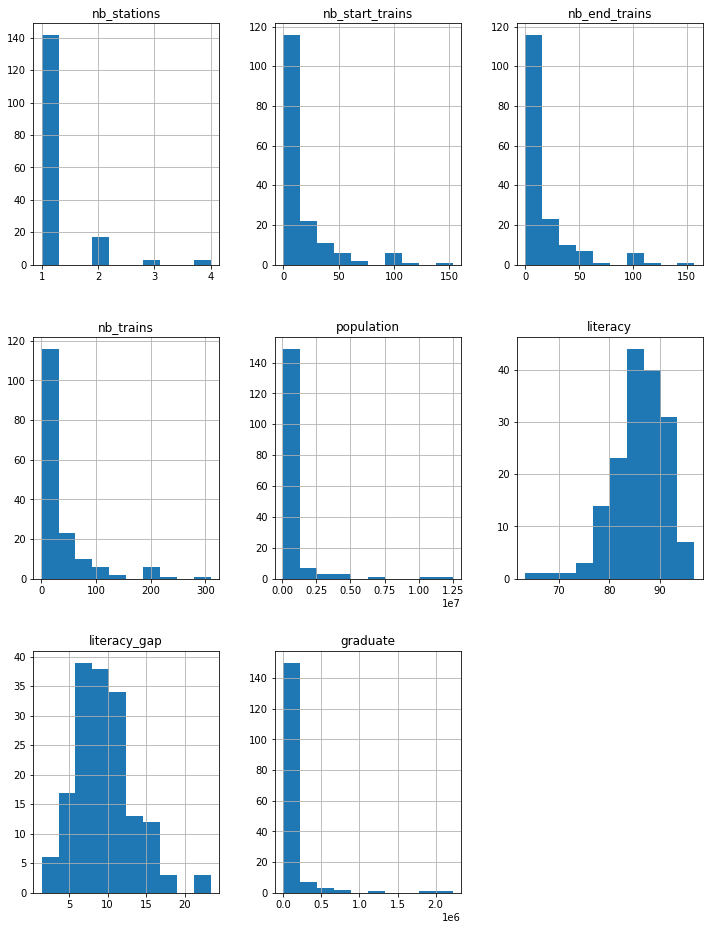

In [37]:
df_cities_stations.hist(bins = 10 , figsize= (12,16))

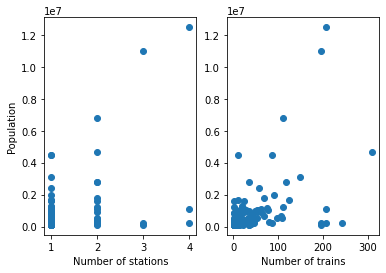

In [38]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(df_cities_stations['nb_stations'],df_cities_stations['population'])
axs[0].set_xlabel('Number of stations')
axs[0].set_ylabel('Population')
axs[1].scatter(df_cities_stations['nb_trains'],df_cities_stations['population'])
axs[1].set_xlabel('Number of trains')
plt.show()

In [39]:
many_stations = df_cities_stations[df_cities_stations['nb_stations'] >= 3]
many_stations

name  nb_stations  nb_start_trains  nb_end_trains  \
15               Greater Mumbai             4               98            108   
16                  Navi Mumbai             4               98            108   
17   Navi Mumbai Panvel Raigarh             4               98            108   
118                       Delhi             3               93            103   
119            Delhi Cantonment             3               93            103   
120                   New Delhi             3               93            103   

     nb_trains  population  literacy  literacy_gap  graduate         state  \
15         206    12478447     90.28          6.62   1802371   MAHARASHTRA   
16         206     1119477     91.57          7.72    192624   MAHARASHTRA   
17         206      194999     90.72          8.20     22631   MAHARASHTRA   
118        196    11007835     87.60          8.24   2221137  NCT OF DELHI   
119        196      116352     91.11          8.28     17317  NCT OF DELHI   
120        196      249998     90.93          7.99     63573  NCT OF DELHI   

       latitude   longitude  
15      19.0760     72.8777  
16   19.0330488  73.0296625  
17   18.9894007  73.1175162  
118     28.7041     77.1025  
119  28.5961279  77.1587375  
120     28.6139     77.2090

In [40]:
df_cities_stations.sort_values('nb_trains', ascending=False).head(10)

name  nb_stations  nb_start_trains  nb_end_trains  \
104                     Chennai             2              153            157   
164                   New Delhi             1              120            123   
17   Navi Mumbai Panvel Raigarh             4               98            108   
15               Greater Mumbai             4               98            108   
16                  Navi Mumbai             4               98            108   
120                   New Delhi             3               93            103   
119            Delhi Cantonment             3               93            103   
118                       Delhi             3               93            103   
41                         Pune             1               76             72   
108                       Patna             1               69             56   

     nb_trains  population  literacy  literacy_gap  graduate         state  \
104        310     4681087     90.33          6.31    879695    TAMIL NADU   
164        243      249998     90.93          7.99     63573  NCT OF DELHI   
17         206      194999     90.72          8.20     22631   MAHARASHTRA   
15         206    12478447     90.28          6.62   1802371   MAHARASHTRA   
16         206     1119477     91.57          7.72    192624   MAHARASHTRA   
120        196      249998     90.93          7.99     63573  NCT OF DELHI   
119        196      116352     91.11          8.28     17317  NCT OF DELHI   
118        196    11007835     87.60          8.24   2221137  NCT OF DELHI   
41         148     3115431     91.61          7.22    656508   MAHARASHTRA   
108        125     1683200     84.71          6.38    307603         BIHAR   

       latitude   longitude  
104  13.0826802  80.2707184  
164     28.6139     77.2090  
17   18.9894007  73.1175162  
15      19.0760     72.8777  
16   19.0330488  73.0296625  
120     28.6139     77.2090  
119  28.5961279  77.1587375  
118     28.7041     77.1025  
41   18.5204303  73.8567437  
108  25.5940947  85.1375645

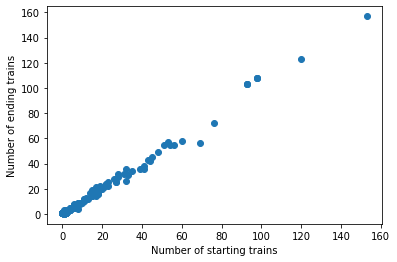

In [41]:
fig, ax = plt.subplots()
ax.scatter(df_cities_stations['nb_start_trains'],df_cities_stations['nb_end_trains'])
ax.set_xlabel('Number of starting trains')
ax.set_ylabel('Number of ending trains')
plt.show()

In [42]:
fig, axs = plt.subplots(3,1,figsize=(12,12))
axs[0].scatter(df_cities_stations['literacy'],df_cities_stations['nb_trains'])
axs[0].set_ylabel('Number of trains')
axs[0].set_xlabel('Literacy')
axs[1].scatter(df_cities_stations['literacy_gap'],df_cities_stations['nb_trains'])
axs[1].set_ylabel('Number of trains')
axs[1].set_xlabel('Gender inequality against literacy')
axs[2].scatter(df_cities_stations['graduate']/df_cities_stations['population'],df_cities_stations['nb_trains'])
axs[2].set_ylabel('Number of trains')
axs[2].set_xlabel('Rate of graduated inhabitants')
plt.show()

### Stations and trains by state

In [43]:
states = set(df_stations['state'])
stations_by_state = {}
for s in states:
    stations_by_state[s] = []
    for idx,row in df_stations.iterrows():
        if row['state'] == s:
            #stations_by_state[s].append(row['city'])
            c = row['city']
            for C in df_cities['name_of_city']:
                if c in C.lower() or C.lower() in c:
                    S = df_cities[df_cities['name_of_city'] == C]['state_name'].to_numpy()[0]
                    stations_by_state[s].append(S)

In [44]:
stations_by_state

{'02': [],
 3.0: ['ASSAM', 'ASSAM', 'CHHATTISGARH', 'ASSAM', 'ASSAM', 'NAGALAND'],
 '07': [],
 2.0: ['ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'MAHARASHTRA',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'RAJASTHAN',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'ANDHRA PRADESH',
  'MAHARASHTRA',
  'ANDHRA PRADESH'],
 '04': ['MAHARASHTRA'],
 7.0: ['NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI',
  'NCT OF DELHI'],
 5.0: ['CHANDIGARH'],
 9.0: ['GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'MADHYA PRADESH',
  'GUJARAT',
  'UTTAR PRADESH',
  'HARYANA',
  'MAHARASHTRA',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT',
  'RAJASTHAN',
  'UTTAR PRADESH',
  'GUJARAT',
  'GUJARAT',
  'GUJARAT'],
 10.0: ['CHHATTISGARH',
  'UTTARAKHAND',
  'RAJA

In [45]:
stations_by_state.pop(8)
stations_by_state.pop('02')
stations_by_state.pop('04')
stations_by_state.pop('06')
stations_by_state.pop('07')
trad_table = {}
for sbs in stations_by_state:
    threshold = 2 * len(stations_by_state[sbs]) / 3
    sts = set(stations_by_state[sbs])
    aux = {}
    for s in sts:
        aux[s] = stations_by_state[sbs].count(s)
    trad_table[sbs] = ''
    for t in sts:
        if aux[t] >= threshold:
            trad_table[sbs] = t
            
trad_table

{3.0: 'ASSAM',
 2.0: 'ANDHRA PRADESH',
 7.0: 'NCT OF DELHI',
 5.0: 'CHANDIGARH',
 9.0: 'GUJARAT',
 10.0: '',
 11.0: '',
 12.0: 'UTTAR PRADESH',
 13.0: 'KERALA',
 16.0: 'MAHARASHTRA',
 19.0: 'KARNATAKA',
 21.0: '',
 22.0: 'PUDUCHERRY',
 23.0: 'PUNJAB',
 24.0: 'RAJASTHAN',
 25.0: 'TAMIL NADU',
 26.0: 'TRIPURA',
 28.0: 'WEST BENGAL',
 33.0: '',
 34.0: 'BIHAR',
 35.0: 'MADHYA PRADESH',
 36.0: 'UTTAR PRADESH',
 37.0: '',
 38.0: 'JHARKHAND',
 39.0: ''}

Contd..